Poisson Equation
===

Import Netgen/NGSolve Python modules:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ngsolve import *
from netgen.geom2d import unit_square
import netgen.gui
%gui tk

In [10]:
fes

Thank you for using NGSolve


In [1]:
exact = 16*x*(1-x)*y*(1-y)
grad_exact = CoefficientFunction( (16*(1-2*x)*y*(1-y), 16*x*(1-x)*(1-2*y)) )
mesh_size = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]
dofs = []
errors = []
grad_errors = []


for h in mesh_size:
    # Generate mesh for different h for unit_square
    mesh = Mesh(unit_square.GenerateMesh(maxh=h))

    # Define Finite Element Space
    fes = H1(mesh, order=1, dirichlet="bottom|right|top|left")
    print ("ndof =", fes.ndof)
    dofs.append(fes.ndof)

    # Declare test, trial and grid functions
    u, v = fes.TnT()
    gfu = GridFunction(fes)

    # Define and assemble forms
    f = LinearForm(fes)
    f += 32 * (y*(1-y)+x*(1-x)) * v * dx

    a = BilinearForm(fes)
    a += grad(u)*grad(v)*dx

    a.Assemble()
    f.Assemble()

    # Solve the linear system
    gfu = GridFunction(fes)


    gfu.vec.data = a.mat.Inverse(fes.FreeDofs()) * f.vec
    grad_gfu = grad(gfu)

    # Compute error
    err = sqrt (Integrate ( (gfu-exact)*(gfu-exact), mesh))
    grad_err = sqrt (Integrate ( (grad_gfu-grad_exact)*(grad_gfu-grad_exact), mesh))
    print ("h = ", h, "L2-error:", err, "grad-error:", grad_err)

    errors.append(err)
    grad_errors.append(grad_err)

    

NameError: name 'x' is not defined

In [18]:
fesN = H1(mesh, order=1)
fesD = H1(mesh, order=1, dirichlet=".*")
print(fesN.FreeDofs())
print(fesD.FreeDofs())
a.mat.Inverse(fes.FreeDofs())

0: 11111111
0: 00000000


In [4]:
for i in range(len(mesh_size)-1):
    print("Convergence rate:", np.log(errors[i+1]/errors[i])/np.log(mesh_size[i+1]/mesh_size[i]))
    print("Convergence rate for grad errors:", np.log(grad_errors[i+1]/grad_errors[i])/np.log(mesh_size[i+1]/mesh_size[i]))

Convergence rate: 2.7913336465407137
Convergence rate for grad errors: 1.4568417263746494
Convergence rate: 2.294955903852603
Convergence rate for grad errors: 1.1436335219459532
Convergence rate: 2.3030038540149285
Convergence rate for grad errors: 1.1423750749082162
Convergence rate: 2.0276775936937663
Convergence rate for grad errors: 1.005276948664073


## Plot Error

In [11]:
print(gfu)

gridfunction 'gfu' on space 'H1HighOrderFESpace(h1ho)'
nested = 1
autoupdate = 0



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
dofs, np.divide(np.ones(len(dofs)), np.array(dofs))

([8, 26, 86, 337, 1245, 4877],
 array([0.125     , 0.03846154, 0.01162791, 0.00296736, 0.00080321,
        0.00020504]))

In [1]:
mesh_size = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]
adofs = [1/h**2 for h in mesh_size]
adofs

[4.0, 16.0, 64.0, 256.0, 1024.0, 4096.0]

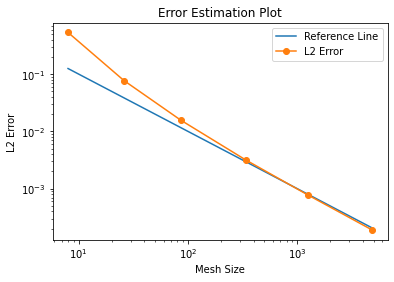

In [13]:

plt.loglog(dofs, np.divide(np.ones(len(dofs)), np.array(dofs)), label="Reference Line")
plt.loglog(dofs,errors, "-o", label="L2 Error")
plt.title("Error Estimation Plot")
plt.xlabel("Mesh Size")
plt.ylabel("L2 Error")
plt.legend()
plt.show()

In [3]:
Draw(exact, mesh, "exact")

In [5]:
Draw(gfu, mesh, "gfu")